/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


(84, 84, 3)


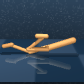

In [1]:
import torch
import cv2
import numpy as np
from PIL import Image

test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/visualize_obs.pt').cpu()

test_image = np.uint8(np.array(test_obs[50])[:3].transpose(1,2,0))
print(test_image.shape)
image = Image.fromarray(test_image)
display(image)

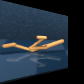

In [2]:
pts1 = np.float32([[0, 0], [84, 0],
                       [0, 84], [84, 84]])
pts2 = np.float32([[0, 0], [68, 16],
                    [0, 84], [68, 68]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(test_image, matrix, (84, 84))

Image.fromarray(np.uint8(result))
     

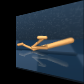

In [3]:
pts1 = np.float32([[0, 0], [84, 0],
                       [0, 84], [84, 84]])
pts2 = np.float32([[16, 16], [84, 0],
                    [16, 68], [84, 84]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(test_image, matrix, (84, 84))

Image.fromarray(np.uint8(result))
     

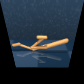

In [4]:
pts1 = np.float32([[0, 0], [84, 0],
                       [0, 84], [84, 84]])
pts2 = np.float32([[0, 0], [84, 0],
                    [16, 68], [68, 68]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(test_image, matrix, (84, 84))
Image.fromarray(np.uint8(result))

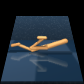

In [5]:
pts1 = np.float32([[0, 0], [84, 0],
                       [0, 84], [84, 84]])
pts2 = np.float32([[16, 16], [68, 16],
                    [0, 84], [84, 84]])

# Apply Perspective Transform Algorithm
matrix = cv2.getPerspectiveTransform(pts1, pts2)
result = cv2.warpPerspective(test_image, matrix, (84, 84))
Image.fromarray(np.uint8(result))

In [6]:
import torch.nn as nn
import kornia.augmentation as aug
class RandomRotate(nn.Module):
    def __init__(self, degrees):
        super().__init__()
        self.random_rotate = aug.RandomRotation(degrees=degrees, same_on_batch=True, p=1.0)

    def forward(self, x):
        n, c, h, w = x.shape 
        for i in range(n):
            temp_x = x[i:i+1].reshape(-1, 3, h, w) / 255.0
            if i == 0:
                print(temp_x.shape)
            out = self.random_rotate(temp_x) * 255.
            total_out = out if i == 0 else torch.cat([total_out, out], axis=0)
        return total_out.reshape(n, c, h, w)
    
random_rotate = RandomRotate(45)

torch.Size([3, 3, 84, 84])


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


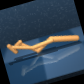

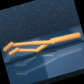

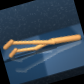

In [7]:
test_sample = test_obs[60:70]
rotate_output = random_rotate(test_sample)

rotate_image = np.uint8(np.array(rotate_output[2])[0:3].transpose(1,2,0))
image = Image.fromarray(rotate_image)
display(image)

rotate_image = np.uint8(np.array(rotate_output[2])[3:6].transpose(1,2,0))
image = Image.fromarray(rotate_image)
display(image)

rotate_image = np.uint8(np.array(rotate_output[2])[6:].transpose(1,2,0))
image = Image.fromarray(rotate_image)
display(image)

In [8]:
import random

class RandomFlip(nn.Module):
    def __init__(self):
        super().__init__()
        self.h_flip = aug.RandomHorizontalFlip(p=1.0, same_on_batch=True)
        self.v_flip = aug.RandomVerticalFlip(p=1.0, same_on_batch=True)

    def forward(self, x):
        n, c, h, w = x.shape 
        if random.random() < 0.5:
            for i in range(n):
                temp_x = x[i:i+1].reshape(-1, 3, h, w) / 255.0
                out = self.h_flip(temp_x) * 255.
                total_out = out if i == 0 else torch.cat([total_out, out], axis=0)
            return total_out.reshape(n, c, h, w)
        else:
            for i in range(n):
                temp_x = x[i:i+1].reshape(-1, 3, h, w) / 255.0
                out = self.v_flip(temp_x) * 255.
                total_out = out if i == 0 else torch.cat([total_out, out], axis=0)
            return total_out.reshape(n, c, h, w)
        
random_flip = RandomFlip()

/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


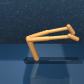

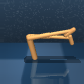

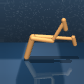

In [9]:
test_sample = torch.Tensor(np.array(test_obs[70:80]))
flip_output = random_flip(test_sample)

flip_image = np.uint8(np.array(flip_output[2])[0:3].transpose(1,2,0))
image = Image.fromarray(flip_image)
display(image)

flip_image = np.uint8(np.array(flip_output[2])[3:6].transpose(1,2,0))
image = Image.fromarray(flip_image)
display(image)

flip_image = np.uint8(np.array(flip_output[2])[6:].transpose(1,2,0))
image = Image.fromarray(flip_image)
display(image)

/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


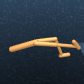

In [10]:
clean_image = np.uint8(np.array(test_obs[2])[0:3].transpose(1,2,0))
image = Image.fromarray(clean_image)
display(image)

In [11]:
import cv2
class Projection_Transformation(nn.Module):
    def __init__(self):
        super().__init__()
        self.base_pts = np.float32([[0, 0], [84, 0],
                           [0, 84], [84, 84]])
        
        self.left_pts = np.float32([[0, 0], [68, 16],
                            [0, 84], [68, 68]])
        
        self.right_pts = np.float32([[16, 16], [84, 0],
                    [16, 68], [84, 84]])
        
        self.top_pts = np.float32([[0, 0], [84, 0],
                    [16, 68], [68, 68]])
        
        self.bottom_pts = np.float32([[16, 16], [68, 16],
                    [0, 84], [84, 84]])
        
    def forward(self, x):
        n, c, h, w = x.shape
        total_out = None

        for i in range(n):
            random_value = random.random()
            temp_x = x[i].permute(1, 2, 0).cpu().numpy()  # Change the order of dimensions and convert to numpy

            if random_value < 0.25:
                matrix = cv2.getPerspectiveTransform(self.base_pts, self.left_pts)
            elif 0.25 <= random_value < 0.5:
                matrix = cv2.getPerspectiveTransform(self.base_pts, self.right_pts)
            elif 0.5 <= random_value < 0.75:
                matrix = cv2.getPerspectiveTransform(self.base_pts, self.top_pts)
            else:
                matrix = cv2.getPerspectiveTransform(self.base_pts, self.bottom_pts)
            
            out = cv2.warpPerspective(temp_x, matrix, (w, h))
            out = torch.from_numpy(out).permute(2, 0, 1).unsqueeze(0)  # Convert back to torch tensor and add batch dimension

            if total_out is None:
                total_out = out
            else:
                total_out = torch.cat([total_out, out], axis=0)

        return total_out



/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


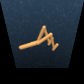

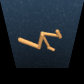

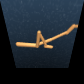

In [12]:
projection_transformation = Projection_Transformation()
test_sample = torch.Tensor(np.array(test_obs[0:4]))
projection_output = projection_transformation(test_sample)

projection_image = np.uint8(np.array(projection_output[0])[0:3].transpose(1,2,0))
image = Image.fromarray(projection_image)
display(image)

projection_image = np.uint8(np.array(projection_output[0])[3:6].transpose(1,2,0))
image = Image.fromarray(projection_image)
display(image)

projection_image = np.uint8(np.array(projection_output[0])[6:].transpose(1,2,0))
image = Image.fromarray(projection_image)
display(image)

/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(84, 84, 3)


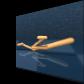

In [14]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/projection_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[50])[:3].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)

(84, 84, 3)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


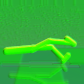

In [20]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/random_conv_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[54])[3:6].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)

(84, 84, 3)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


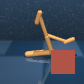

In [41]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/random_cutout_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[60])[:3].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)

(84, 84, 3)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


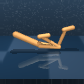

In [47]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/random_flip_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[95])[3:6].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)

/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(84, 84, 3)


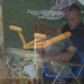

In [48]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/random_overlay_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[95])[3:6].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)

(84, 84, 3)


/home/nas2_userI/dongyoonhwang/anaconda3/envs/hansen_dmcgb/lib/python3.7/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


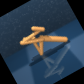

In [50]:
import torch
import cv2
import numpy as np
from PIL import Image

projection_test_obs = torch.load('/home/nas2_userI/dongyoonhwang/dmcontrol-generalization-benchmark/visualization/random_rotate_augmented.pt').cpu()

projection_test_image = np.uint8(np.array(projection_test_obs[15])[3:6].transpose(1,2,0))
print(projection_test_image.shape)
projection_image = Image.fromarray(projection_test_image)
display(projection_image)